In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("/content/IMDB Dataset.csv", engine='python', on_bad_lines='skip')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df.shape

(50000, 2)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def preprocess_text(text):
  text=text.lower()

  text=re.sub(r'<.*?>','',text)

  text=re.sub(r'[^a-zA-Z\s]','',text)
  text=re.sub(r'\d+','',text)

  tokens=word_tokenize(text)

  stemmer=WordNetLemmatizer()
  tokens = [stemmer.lemmatize(word) for word in tokens]

  stop_words=set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]


  text=' '.join(tokens).strip()

  return text

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import spacy
from nltk.corpus import stopwords

# Load spaCy model once (do this outside the function, to avoid reloading every time)
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

def preprocess_withSpaCy_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Use spaCy to tokenize and lemmatize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words and word.strip() != '']

    text = ' '.join(tokens).strip()
    return text


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stdata=preprocess_text("One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.")

In [ ]:
df['cleaned_review'] = df['review'].apply(preprocess_text)
#df['cleaned_review_with_Spacy']=df['review'].apply(preprocess_withSpaCy_text)
display(df.head())

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer ha mentioned watching oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wa wonderful way spend time hot summer...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [ ]:
df.head(20)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer ha mentioned watching oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wa wonderful way spend time hot summer...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
5,"Probably my all-time favorite movie, a story o...",positive,probably alltime favorite movie story selfless...
6,I sure would like to see a resurrection of a u...,positive,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",negative,show wa amazing fresh innovative idea first ai...
8,Encouraged by the positive comments about this...,negative,encouraged positive comment film wa looking fo...
9,If you like original gut wrenching laughter yo...,positive,like original gut wrenching laughter like movi...


In [ ]:
from sklearn.preprocessing import LabelEncoder

Label_encoder=LabelEncoder()

df['encoded_sentiment']=Label_encoder.fit_transform(df['sentiment'])

In [ ]:
df

,review,sentiment,cleaned_review,encoded_sentiment
0,One of the other reviewers has mentioned that ...,positive,one reviewer ha mentioned watching oz episode ...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wa wonderful way spend time hot summer...,1
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,1
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,0
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...,0
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...,0


In [ ]:
df['encoded_sentiment'].value_counts()

,count
encoded_sentiment,
1,25000
0,25000


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
Tokenizer=Tokenizer(num_words=10000, oov_token="<OOV>")
#Tokenizer.fit_on_texts(df['cleaned_review_with_Spacy'])
Tokenizer.fit_on_texts(df['cleaned_review'])

sequences=Tokenizer.texts_to_sequences(df['cleaned_review'])

In [ ]:
max_length=max([len(seq) for seq in sequences])
max_length

1431

In [ ]:
padded_sequences=pad_sequences(sequences,maxlen=max_length,padding='post',truncating='post')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout ,Bidirectional

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_length))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # for binary

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
padded_sequences_tensor = tf.convert_to_tensor(padded_sequences, dtype=tf.float32)
encoded_sentiment_tensor = tf.convert_to_tensor(df['encoded_sentiment'], dtype=tf.float32)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 127s 96ms/step - accuracy: 0.7410 - loss: 0.5039 - val_accuracy: 0.8367 - val_loss: 0.4048
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 95ms/step - accuracy: 0.8818 - loss: 0.3185 - val_accuracy: 0.8855 - val_loss: 0.2890
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 96ms/step - accuracy: 0.9215 - loss: 0.2143 - val_accuracy: 0.8796 - val_loss: 0.3009
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 151s 103ms/step - accuracy: 0.9375 - loss: 0.1767 - val_accuracy: 0.8845 - val_loss: 0.3207
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 103ms/step - accuracy: 0.9478 - loss: 0.1524 - val_accuracy: 0.8724 - val_loss: 0.3676


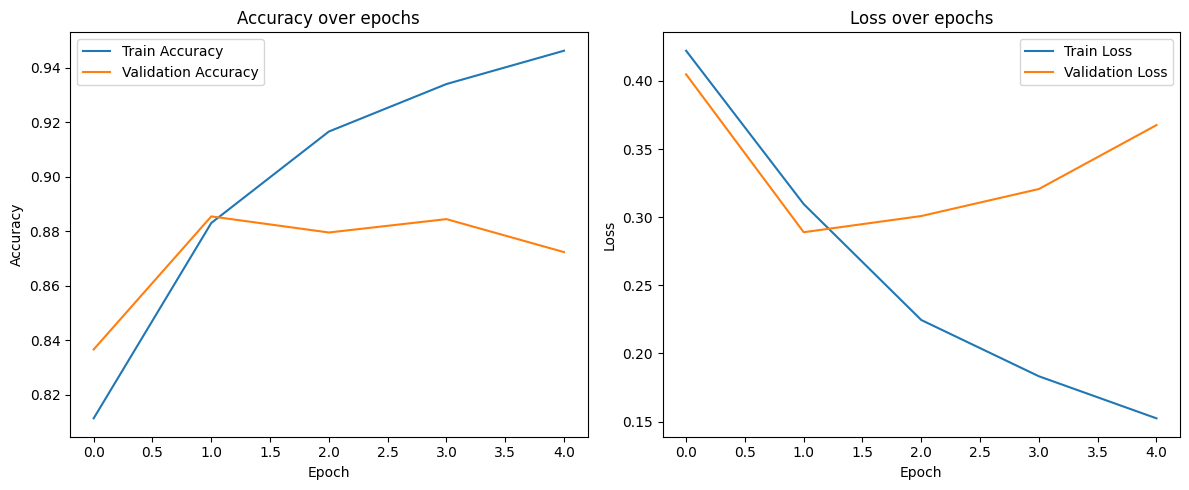

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    padded_sequences,
    df['encoded_sentiment'],
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stop]
)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_pred=(model.predict(padded_sequences)>0.5).astype("int32")

cm=confusion_matrix(df['encoded_sentiment'],y_pred)
print(cm)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step
[[22541  2459]
 [ 1542 23458]]


In [ ]:
print("Classification Report: ",classification_report(df['encoded_sentiment'],y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.94      0.90      0.92     25000
           1       0.91      0.94      0.92     25000

    accuracy                           0.92     50000
   macro avg       0.92      0.92      0.92     50000
weighted avg       0.92      0.92      0.92     50000



In [ ]:
model.save('imdb_sentiment_analysis_model.h5')

In [ ]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(Tokenizer, f)

